In [1]:
import matplotlib.pyplot as plt
import librosa
import glob
import numpy as np
import librosa.display

In [2]:
drone_path = '../data/drone/11-30-2.wav'
background_path = '../data/background/11-30 11_35_05.wav'

drone_files = glob.glob(drone_path)
background_files = glob.glob(background_path)

In [3]:
def load(files, sr=44100):
    [raw, sr] = librosa.load(files[0], sr=sr)
    for f in files[1:]:
        [array, sr] = librosa.load(f, sr=sr)
        raw = np.hstack((raw, array))
    print(raw.shape)
    return raw

In [4]:
drone_raw = load(drone_files)
background_raw = load(background_files)

(1638400,)
(1638400,)


In [5]:
drone_mfcc_fig = librosa.feature.mfcc(drone_raw, sr=44100, n_mfcc=16)
background_mfcc_fig = librosa.feature.mfcc(background_raw, sr=44100, n_mfcc=16)

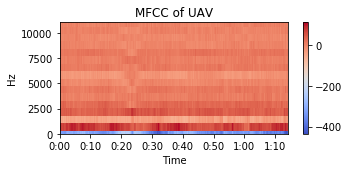

In [6]:
plt.figure(figsize=(5,2.5))
librosa.display.specshow(drone_mfcc_fig, y_axis='hz',x_axis='time')
plt.colorbar()
plt.title('MFCC of UAV')
plt.tight_layout()
plt.savefig('uav_mfcc.pdf')

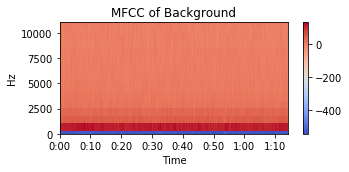

In [7]:
plt.figure(figsize=(5,2.5))
librosa.display.specshow(background_mfcc_fig, y_axis='hz',x_axis='time')
plt.colorbar()
plt.title('MFCC of Background')
plt.tight_layout()
plt.savefig('background_mfcc.pdf')

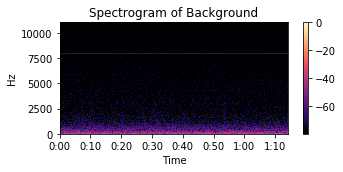

In [8]:
audio_name = '../data/background/11-30 11_35_05.wav'
hop_length = 256
window_size = 4096

y, sr = librosa.load(audio_name)
window = np.hanning(window_size)
out  = librosa.core.spectrum.stft(y, n_fft = window_size, hop_length = hop_length, 
       window=window)
out = 2 * np.abs(out) / np.sum(window)

plt.figure(figsize=(5,2.5))
librosa.display.specshow(librosa.amplitude_to_db(out,ref=np.max), y_axis='hz', x_axis='time')
plt.colorbar()
plt.title('Spectrogram of Background')
plt.tight_layout()
plt.savefig('background_spectrogram.pdf')

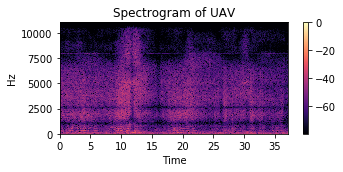

In [13]:
audio_name = '../data/drone/11-30-2.wav'
hop_length = 512
window_size = 8196

y, sr = librosa.load(audio_name)
window = np.hanning(window_size)
out  = librosa.core.spectrum.stft(y, n_fft = window_size, hop_length = hop_length, 
       window=window)
out = 2 * np.abs(out) / np.sum(window)

plt.figure(figsize=(5,2.5))
librosa.display.specshow(librosa.amplitude_to_db(out,ref=np.max), y_axis='hz', x_axis='time')
plt.colorbar()
plt.title('Spectrogram of UAV')
plt.tight_layout()
plt.savefig('uav_spectrogram.pdf')